In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend as K

In [3]:
dataframe = pd.read_csv("dataset.csv") 

In [4]:
dataframe[0:5]

,symbol,timestamp,tradingDay,open,high,low,close,volume
0,AAPL,2012-12-28T13:00:00-05:00,2012-12-28,63.90309,63.94925,63.79329,63.83222,7480221
1,AAPL,2012-12-28T14:00:00-05:00,2012-12-28,63.83010,63.85942,63.69847,63.78593,9322846
2,AAPL,2012-12-28T15:00:00-05:00,2012-12-28,63.78519,64.16386,63.39777,63.56122,29107755
3,AAPL,2012-12-31T09:00:00-05:00,2012-12-31,63.69847,65.42902,63.50757,65.37038,27370356
4,AAPL,2012-12-31T10:00:00-05:00,2012-12-31,65.37038,65.78086,65.08591,65.52260,30568603


In [5]:
dataframe.describe()

,open,high,low,close,volume
count,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,64.951775,65.446360,64.694638,65.197308,2.191688e+07
std,1.046528,1.097636,1.001888,1.102629,8.632063e+06
min,63.698470,63.859420,63.397770,63.561220,7.480221e+06
25%,63.848347,64.480150,63.722175,64.216760,1.788523e+07
50%,65.449605,65.729710,65.100255,65.521975,2.305863e+07
75%,65.567820,66.035708,65.352010,65.634258,2.867341e+07
max,66.635540,66.801480,66.217550,66.655000,3.251709e+07


In [6]:
dataframe["timestamp"] = pd.to_datetime(dataframe["timestamp"]).values.astype(np.int64) 
dataframe = dataframe.drop(["tradingDay"], axis=1)

dataframe['symbol'] = pd.factorize(dataframe['symbol'])[0] + 1


In [7]:
dataframe[0:5]

,symbol,timestamp,open,high,low,close,volume
0,1,1356717600000000000,63.90309,63.94925,63.79329,63.83222,7480221
1,1,1356721200000000000,63.83010,63.85942,63.69847,63.78593,9322846
2,1,1356724800000000000,63.78519,64.16386,63.39777,63.56122,29107755
3,1,1356962400000000000,63.69847,65.42902,63.50757,65.37038,27370356
4,1,1356966000000000000,65.37038,65.78086,65.08591,65.52260,30568603


In [8]:
dataframe.describe()

,symbol,timestamp,open,high,low,close,volume
count,10.0,1.000000e+01,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,1.0,1.356898e+18,64.951775,65.446360,64.694638,65.197308,2.191688e+07
std,0.0,1.219049e+14,1.046528,1.097636,1.001888,1.102629,8.632063e+06
min,1.0,1.356718e+18,63.698470,63.859420,63.397770,63.561220,7.480221e+06
25%,1.0,1.356784e+18,63.848347,64.480150,63.722175,64.216760,1.788523e+07
50%,1.0,1.356968e+18,65.449605,65.729710,65.100255,65.521975,2.305863e+07
75%,1.0,1.356976e+18,65.567820,66.035708,65.352010,65.634258,2.867341e+07
max,1.0,1.356984e+18,66.635540,66.801480,66.217550,66.655000,3.251709e+07


In [10]:
X = dataframe.drop(["close"], axis=1)
y = dataframe["close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
nEpocas = 50
steps_per_epoch = 100
VALIDATION_SIZE = 1
BATCH_SIZE = 16
checkpoint = "bestModelTextGen.hdf5"

In [44]:
def soft_acc(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

model = Sequential()

model.add(Dense(units=1, activation='relu', input_dim = len(X.columns)))

model.add(Dense(units=1, activation='linear'))

model.compile(loss='mean_absolute_error', optimizer='adam', metrics = ['mse', 'mae', 'mape', 'cosine'])

mc = ModelCheckpoint(checkpoint, monitor='loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, min_delta=0.000001)

# fit the model
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / BATCH_SIZE))
val_steps = compute_steps_per_epoch(VALIDATION_SIZE)

#batch_size = numero de execuções antes de atualizar os erros.
history = model.fit( X_train, y_train, epochs=nEpocas, steps_per_epoch=steps_per_epoch, callbacks=[es, mc], validation_steps = val_steps, validation_data=(X_test, y_test))


Train on 6 samples, validate on 4 samples
Epoch 1/50
100/100 [==============================] - 2s 23ms/step - loss: 659016018819693952.0000 - mean_squared_error: 437182855286924720610280671117574144.0000 - mean_absolute_error: 659016018819693952.0000 - mean_absolute_percentage_error: 1008425070494786560.0000 - cosine_proximity: -1.0000 - val_loss: 568351716609622016.0000 - val_mean_squared_error: 323023656881066958695356634935328768.0000 - val_mean_absolute_error: 568351716609622016.0000 - val_mean_absolute_percentage_error: 875378656355024896.0000 - val_cosine_proximity: -1.0000

Epoch 00001: loss improved from inf to 659016018819693952.00000, saving model to bestModelTextGen.hdf5
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 491550471380994624.0000 - mean_squared_error: 243487971442425915226096941517504512.0000 - mean_absolute_error: 491550471380994624.0000 - mean_absolute_percentage_error: 752169600236765824.0000 - cosine_proximity: -1.0000 - val_loss: 4


Epoch 00013: loss did not improve from 32518602015703.03906
Epoch 14/50
100/100 [==============================] - 0s 2ms/step - loss: 36014016158597.1172 - mean_squared_error: 1925224805017269291234361344.0000 - mean_absolute_error: 36014016158597.1172 - mean_absolute_percentage_error: 55108578864332.8047 - cosine_proximity: -5.9605e-10 - val_loss: 8734676877312.0000 - val_mean_squared_error: 76294575955672080209412096.0000 - val_mean_absolute_error: 8734676877312.0000 - val_mean_absolute_percentage_error: 13453200719872.0000 - val_cosine_proximity: -1.0000

Epoch 00014: loss did not improve from 32518602015703.03906
Epoch 15/50
100/100 [==============================] - 0s 2ms/step - loss: 38229657302138.8828 - mean_squared_error: 2154743769481804210199592960.0000 - mean_absolute_error: 38229657302138.8828 - mean_absolute_percentage_error: 58498949710970.8828 - cosine_proximity: -0.0200 - val_loss: 74366100439040.0000 - val_mean_squared_error: 5530317345015433530718552064.0000 - val

100/100 [==============================] - 0s 2ms/step - loss: 19713409672806.4023 - mean_squared_error: 531260471926836058124189696.0000 - mean_absolute_error: 19713409672806.4023 - mean_absolute_percentage_error: 30165422718320.6367 - cosine_proximity: 0.0000e+00 - val_loss: 14422819995648.0000 - val_mean_squared_error: 208017734813213847164289024.0000 - val_mean_absolute_error: 14422819995648.0000 - val_mean_absolute_percentage_error: 22214111920128.0000 - val_cosine_proximity: -1.0000

Epoch 00028: loss did not improve from 17553515707709.43945
Epoch 29/50
100/100 [==============================] - 0s 2ms/step - loss: 19835297352908.8008 - mean_squared_error: 537728531044259345853317120.0000 - mean_absolute_error: 19835297352908.8008 - mean_absolute_percentage_error: 30351934766448.6367 - cosine_proximity: 0.0000e+00 - val_loss: 14525746118656.0000 - val_mean_squared_error: 210997308256231635069960192.0000 - val_mean_absolute_error: 14525746118656.0000 - val_mean_absolute_percentag

100/100 [==============================] - 0s 2ms/step - loss: 20639939200286.7188 - mean_squared_error: 581344949172454219516477440.0000 - mean_absolute_error: 20639939200286.7188 - mean_absolute_percentage_error: 31583196138700.8008 - cosine_proximity: 0.0000e+00 - val_loss: 15216929669120.0000 - val_mean_squared_error: 231554931701039844386930688.0000 - val_mean_absolute_error: 15216929669120.0000 - val_mean_absolute_percentage_error: 23437204520960.0000 - val_cosine_proximity: -1.0000

Epoch 00042: loss did not improve from 17553515707709.43945
Epoch 43/50
100/100 [==============================] - 0s 2ms/step - loss: 20662491637350.4023 - mean_squared_error: 582582513409481191655997440.0000 - mean_absolute_error: 20662491637350.4023 - mean_absolute_percentage_error: 31617705993830.4023 - cosine_proximity: 5.9605e-10 - val_loss: 15237247926272.0000 - val_mean_squared_error: 232173709284248357586337792.0000 - val_mean_absolute_error: 15237247926272.0000 - val_mean_absolute_percentag

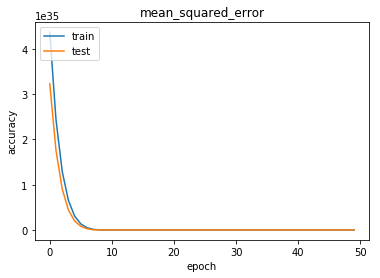

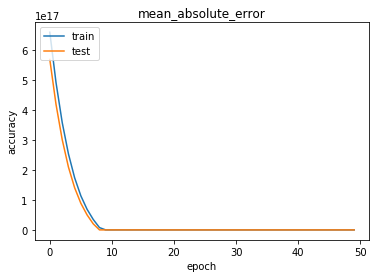

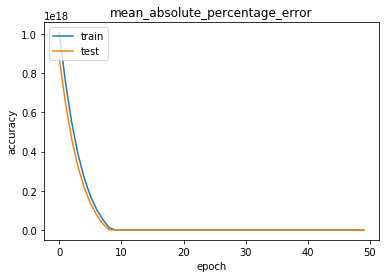

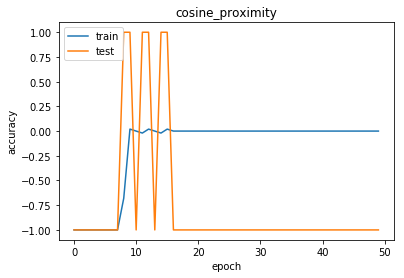

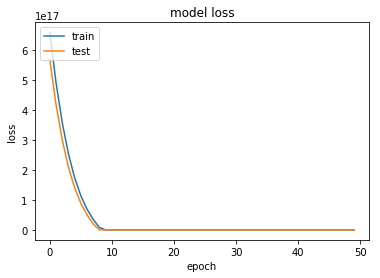

In [45]:

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('mean_absolute_percentage_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['cosine_proximity'])
plt.plot(history.history['val_cosine_proximity'])
plt.title('cosine_proximity')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
